# Horseracing exercise

If you have not installed these libraries, uncomment these lines:

In [168]:
# !pip install numpy
# !pip install pandas
# !pip install seaborn
# !pip install scipy
# !pip install matplotlib
# !pip install sklearn

import libraries

In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

define functions

In [170]:
def logit_pvalue(model, x):
    """ Calculate z-scores for scikit-learn LogisticRegression.
    parameters:
        model: fitted sklearn.linear_model.LogisticRegression with intercept and large C
        x:     matrix on which the model was fit
    This function uses asymtptics for maximum likelihood estimates.
    """
    p = model.predict_proba(x)
    n = len(p)
    m = len(model.coef_[0]) + 1
    coefs = np.concatenate([model.intercept_, model.coef_[0]])
    x_full = np.matrix(np.insert(np.array(x), 0, 1, axis = 1))
    ans = np.zeros((m, m))
    for i in range(n):
        ans = ans + np.dot(np.transpose(x_full[i, :]), x_full[i, :]) * p[i,1] * p[i, 0]
    vcov = np.linalg.inv(np.matrix(ans))
    se = np.sqrt(np.diag(vcov))
    t =  coefs/se  
    p = (1 - norm.cdf(abs(t))) * 2
    return t,p

def freq_plot(var):
    country_count = df[var].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(country_count.index[0:20],country_count.values[0:20],alpha=0.9)
    plt.title('Frequency Distribution of '+var)
    plt.ylabel('Number of Occurrences',fontsize=12)
    plt.xlabel(var,fontsize=12)
    plt.show()
    
def freq_plot_rot(var):
    country_count = df[var].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(country_count.index[0:20],country_count.values[0:20],alpha=0.9)
    plt.title('Frequency Distribution of '+var)
    plt.ylabel('Number of Occurrences',fontsize=12)
    plt.xlabel(var,fontsize=12)
    plt.xticks(rotation=90)
    plt.show()

load dataset

In [171]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)
df = pd.read_csv("datatests.csv")
print(df.head())

       date  horseID  raceID  numberOfRunners  finishingPosition  weight  \
0  20170101  1269845  664916                8                  1     120   
1  20170101   983074  664916                8                  2     125   
2  20170101   904959  664916                8                  3     137   
3  20170101  1022896  664916                8                  4     120   
4  20170101  1185803  664916                8                  5     115   

   ageInDays  daysSinceLastRace  nPastRaces  raceClass  
0       1035                  0           0          6  
1       1006                 10          13          6  
2       1354                 12           3          6  
3       1007                 69           5          6  
4        988                 27           2          6  


Visualise the data

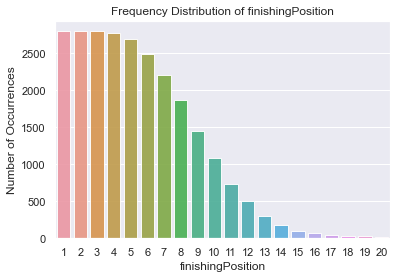

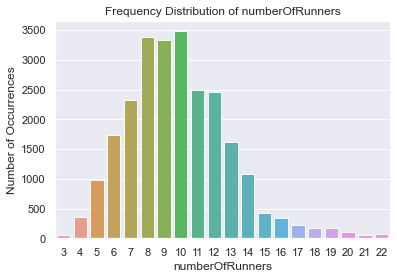

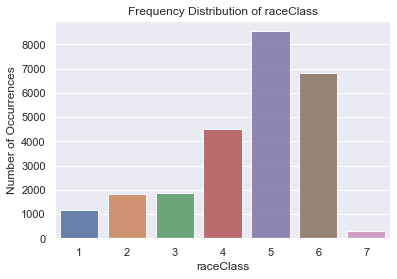

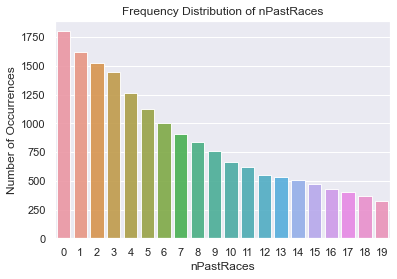

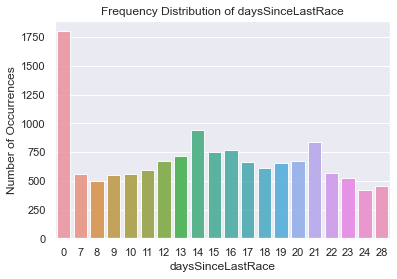

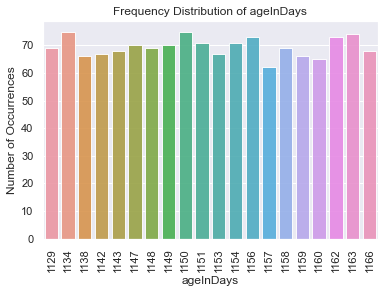

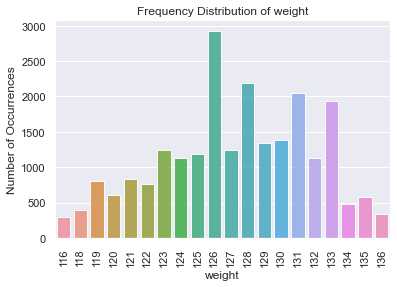

In [172]:
discrete=['finishingPosition','numberOfRunners','raceClass','nPastRaces','daysSinceLastRace']
discrete_rot=['ageInDays','weight']
for i in discrete:
    freq_plot(i)
    
for i in discrete_rot:
    freq_plot_rot(i)

relevant descriptive statistics on pertinent variables

In [173]:
print(df.describe())

            date   horseID   raceID  numberOfRunners  finishingPosition  \
count    25003.0   25003.0  25003.0          25003.0            25003.0   
mean  20170429.8  988148.8 672204.3             10.0                5.5   
std        165.9  209296.9   3716.4              3.3                3.4   
min   20170101.0  300119.0 639909.0              3.0                1.0   
25%   20170315.0  855831.0 669359.0              8.0                3.0   
50%   20170502.0  897540.0 672797.0             10.0                5.0   
75%   20170601.0 1067092.5 675353.0             12.0                8.0   
max   20170627.0 1515390.0 679813.0             29.0               29.0   

       weight  ageInDays  daysSinceLastRace  nPastRaces  raceClass  
count 25003.0    25003.0            25003.0     25003.0    25003.0  
mean    127.3     1672.7               53.4        18.1        4.6  
std       5.9      725.0               82.4        21.9        1.4  
min     105.0      672.0                0.0     

checking NaN values

In [174]:
for col in df.columns:
    print(df[col].isna().sum())

0
0
0
0
0
0
0
0
0
0


Create the target variable for prediction

In [175]:
df['RaceWinner']=np.where(df['finishingPosition']==1,1,0)

create date variable in date format, just in case

In [176]:
df['date_dt']=pd.to_datetime(df['date'],format='%Y%m%d').dt.date

reordering of variables in dataframe

In [177]:
first_col = df.pop('date')
df.insert(0,'date', first_col)
first_col = df.pop('date_dt')
df.insert(0,'date_dt', first_col)
first_col = df.pop('finishingPosition')
df.insert(0,'finishingPosition', first_col)
first_col = df.pop('RaceWinner')
df.insert(0,'RaceWinner', first_col)

reassign horse id

In [178]:
df['horseID']=df.groupby(['horseID']).ngroup()

Estimation / Prediction Model

In [179]:
df_copy=df.copy()
X=df.iloc[:,6:]
print("\n Features: ",X.columns)
y=df.iloc[:,0]

clf = LogisticRegression(random_state=0).fit(X, y)

print("\n Model Score: ",round(clf.score(X, y),4))

df['predict_probs']=clf.predict_proba(X)[:,1]


 Features:  Index(['numberOfRunners', 'weight', 'ageInDays', 'daysSinceLastRace',
       'nPastRaces', 'raceClass'],
      dtype='object')

 Model Score:  0.8881


get coefficients, t-statistics and p-values

Feature: 0, Score: -0.13096
Feature: 1, Score: -0.00199
Feature: 2, Score: -0.00025
Feature: 3, Score: -0.00054
Feature: 4, Score: 0.00258
Feature: 5, Score: -0.03674


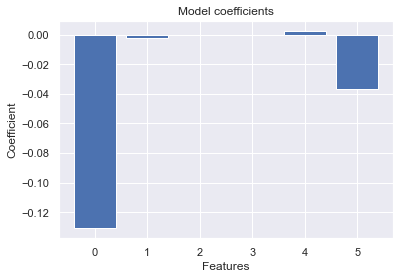


 tstats with constant:  [-1.7000e-02 -1.8074e+01 -5.7100e-01 -4.1710e+00 -2.0100e+00  1.2770e+00
 -2.4620e+00]

 p-values with constant:  [0.987 0.    0.568 0.    0.044 0.202 0.014]


In [180]:
importance = clf.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title('Model coefficients')
plt.ylabel('Coefficient')
plt.xlabel('Features')
plt.show()

tstats=logit_pvalue(clf,X)[0]
print("\n tstats with constant: ",np.round(tstats,3))
pvalues=logit_pvalue(clf,X)[1]
print("\n p-values with constant: ",np.round(pvalues,3))

Main takeaways - comments:

<li>1. The largest coefficient belongs to numberOfRunners. Below, we see a negative relation between the predicted probability to be a winner and the number of runners. This is expected as with more competitors, holding everything else constant, it is more difficult to win a race.</li>
<li>2. Other coefficients that are statistically significant (at the 5% significance level) are ageInDays, daysSinceLastRace and raceClass. The predicted relation is plotted below.</li>
<li>3. One aspect of the estimation that I find least satisfactory is that the probability of winning by horse is in general homogeneous across the whole set of horses, as can be seen below. I would have expected to see some more differences by horse, but we have just a few variables in the model.</li>

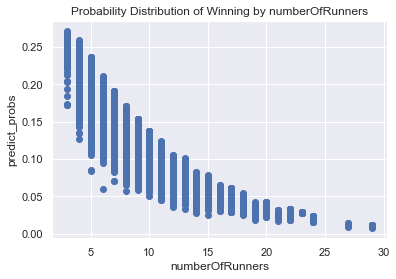

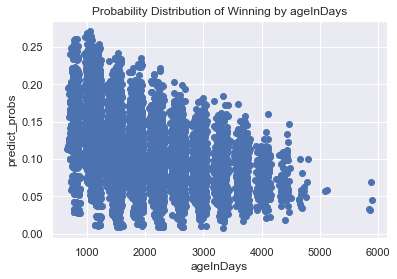

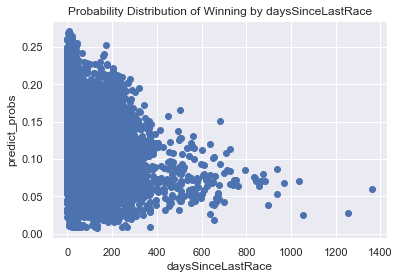

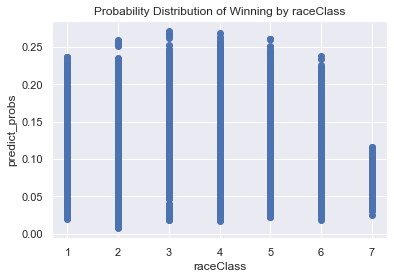

In [181]:
plt.scatter(df['numberOfRunners'],df['predict_probs'])
plt.ylabel('predict_probs',fontsize=12)
plt.xlabel('numberOfRunners',fontsize=12)
plt.title('Probability Distribution of Winning by numberOfRunners')
plt.show()
#
plt.scatter(df['ageInDays'],df['predict_probs'])
plt.ylabel('predict_probs',fontsize=12)
plt.xlabel('ageInDays',fontsize=12)
plt.title('Probability Distribution of Winning by ageInDays')
plt.show()
#
plt.scatter(df['daysSinceLastRace'],df['predict_probs'])
plt.ylabel('predict_probs',fontsize=12)
plt.xlabel('daysSinceLastRace',fontsize=12)
plt.title('Probability Distribution of Winning by daysSinceLastRace')
plt.show()
#
plt.scatter(df['raceClass'],df['predict_probs'])
plt.ylabel('predict_probs',fontsize=12)
plt.xlabel('raceClass',fontsize=12)
plt.title('Probability Distribution of Winning by raceClass')
plt.show()
#

<AxesSubplot:title={'center':'Probability Distribution of Winning by HorseID'}, xlabel='horseID', ylabel='predict_probs'>

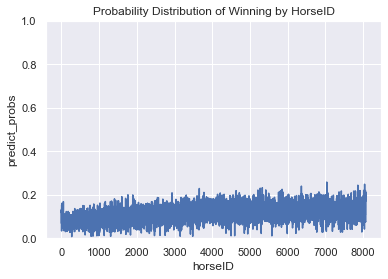

In [182]:
horses=df.groupby('horseID')['predict_probs'].agg('mean')
horses.plot(ylim=[0,1],ylabel='predict_probs',title='Probability Distribution of Winning by HorseID')

Improve the model Estimation / Prediction by adding variables:
<li>1. I will add cumulated wins by Horse. My hypothesis is that past wins can help predict future wins.</li>

In [183]:
df=df_copy.copy()
#previous cum_Wins
df['cum_Wins']=df.groupby(['horseID'])['RaceWinner'].cumsum()
df['cum_Wins']=np.where((df['finishingPosition']==1) & (df['cum_Wins']>0),df['cum_Wins']-1,df['cum_Wins'])

Estimation / Prediction Model

In [184]:
X=df.iloc[:,6:]
print("\n Features: ",X.columns)
y=df.iloc[:,0]

clf = LogisticRegression(random_state=0).fit(X, y)

print("\n Model Score: ",round(clf.score(X, y),4))

df['predict_probs']=clf.predict_proba(X)[:,1]


 Features:  Index(['numberOfRunners', 'weight', 'ageInDays', 'daysSinceLastRace',
       'nPastRaces', 'raceClass', 'cum_Wins'],
      dtype='object')

 Model Score:  0.8881


get coefficients, t-statistics and p-values

Feature: 0, Score: -0.12790
Feature: 1, Score: -0.00118
Feature: 2, Score: -0.00037
Feature: 3, Score: -0.00032
Feature: 4, Score: 0.00477
Feature: 5, Score: -0.03946
Feature: 6, Score: 0.22523


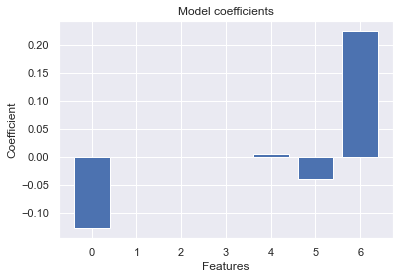


 tstats with constant:  [ -0.076 -17.847  -0.338  -5.972  -1.159   2.361  -2.622   6.475]

 p-values with constant:  [0.939 0.    0.735 0.    0.246 0.018 0.009 0.   ]


In [185]:
importance = clf.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title('Model coefficients')
plt.ylabel('Coefficient')
plt.xlabel('Features')
plt.show()

tstats=logit_pvalue(clf,X)[0]
print("\n tstats with constant: ",np.round(tstats,3))
pvalues=logit_pvalue(clf,X)[1]
print("\n p-values with constant: ",np.round(pvalues,3))

Main takeaways - comments:
1. The largest coefficient now belongs to cum_Wins. The coefficient is statistically significant at the 1% significance level. It looks like past wins can help predict future wins.
2. The variables that are statistically signifcant are numberOfRunners, ageInDays, nPastRaces and raceClass. I show these relations below.
3. The probability of winning by horse is slightly more dispersed than before, but still quite low.

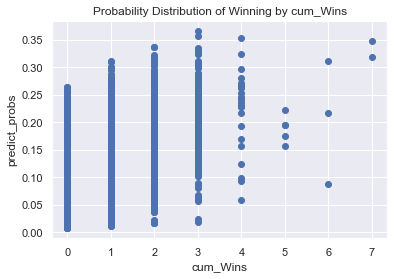

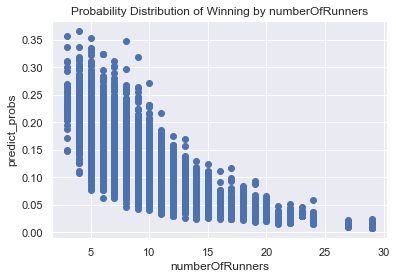

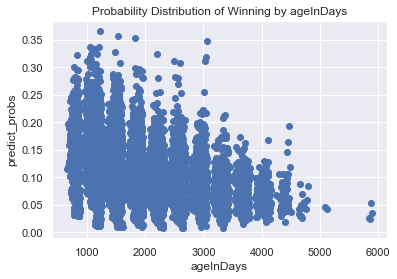

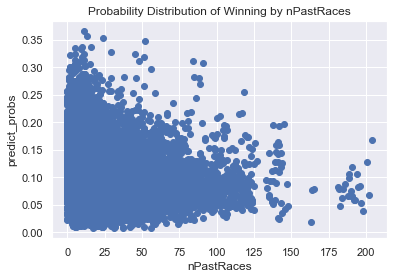

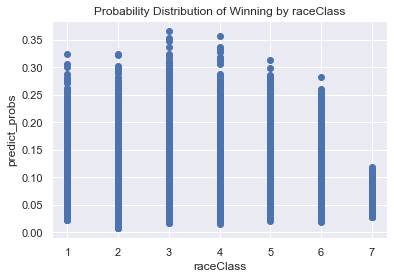

In [186]:
plt.scatter(df['cum_Wins'],df['predict_probs'])
plt.ylabel('predict_probs',fontsize=12)
plt.xlabel('cum_Wins',fontsize=12)
plt.title('Probability Distribution of Winning by cum_Wins')
plt.show()
#
plt.scatter(df['numberOfRunners'],df['predict_probs'])
plt.ylabel('predict_probs',fontsize=12)
plt.xlabel('numberOfRunners',fontsize=12)
plt.title('Probability Distribution of Winning by numberOfRunners')
plt.show()
#
plt.scatter(df['ageInDays'],df['predict_probs'])
plt.ylabel('predict_probs',fontsize=12)
plt.xlabel('ageInDays',fontsize=12)
plt.title('Probability Distribution of Winning by ageInDays')
plt.show()
#
plt.scatter(df['nPastRaces'],df['predict_probs'])
plt.ylabel('predict_probs',fontsize=12)
plt.xlabel('nPastRaces',fontsize=12)
plt.title('Probability Distribution of Winning by nPastRaces')
plt.show()
#
plt.scatter(df['raceClass'],df['predict_probs'])
plt.ylabel('predict_probs',fontsize=12)
plt.xlabel('raceClass',fontsize=12)
plt.title('Probability Distribution of Winning by raceClass')
plt.show()
#

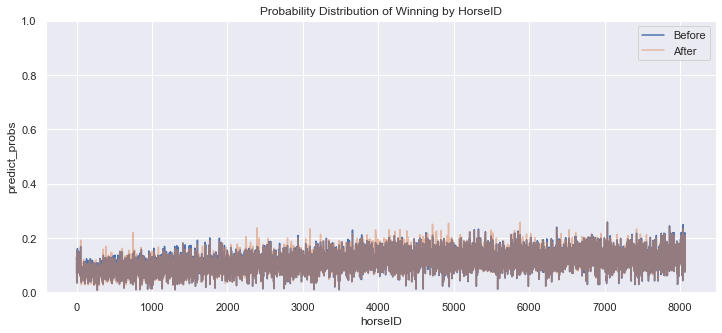

Before, Std. Deviation: 0.0336
After, Std. Deviation: 0.036


In [187]:
horses_after=df.groupby('horseID')['predict_probs'].agg('mean')
plt.figure(figsize=(12,5))
horses.plot(label="Before",ylim=[0,1],ylabel='predict_probs',title='Probability Distribution of Winning by HorseID')
horses_after.plot(alpha=0.5,label="After",ylim=[0,1],ylabel='predict_probs',title='Probability Distribution of Winning by HorseID')
plt.legend()
plt.show()
print("Before, Std. Deviation:",round(horses.std(),4))
print("After, Std. Deviation:",round(horses_after.std(),4))